<a href="https://colab.research.google.com/github/putricinto/Machine-Learning-Project/blob/master/Assignment_06_W07_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import sys
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [40]:
url = 'https://raw.githubusercontent.com/putricinto/Machine-Learning-Project/master/bank.csv'
bank = pd.read_csv(url)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [41]:
#Define Type of Features
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


# **Descriptive Statistics**

In [0]:
#Changing Day Variable into object
bank['day'] = bank['day'].astype(str)

In [43]:
bank.describe()

,age,balance,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,3881.000000,63.000000,854.000000,58.000000


# **Data Visualization**

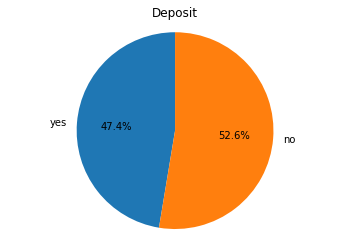

In [44]:
#Pie Chart of Deposit Variable (Label)
y=list(bank['deposit'])
labels = 'yes', 'no'
sizes = [y.count('yes'), y.count('no')]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Deposit')

plt.show()

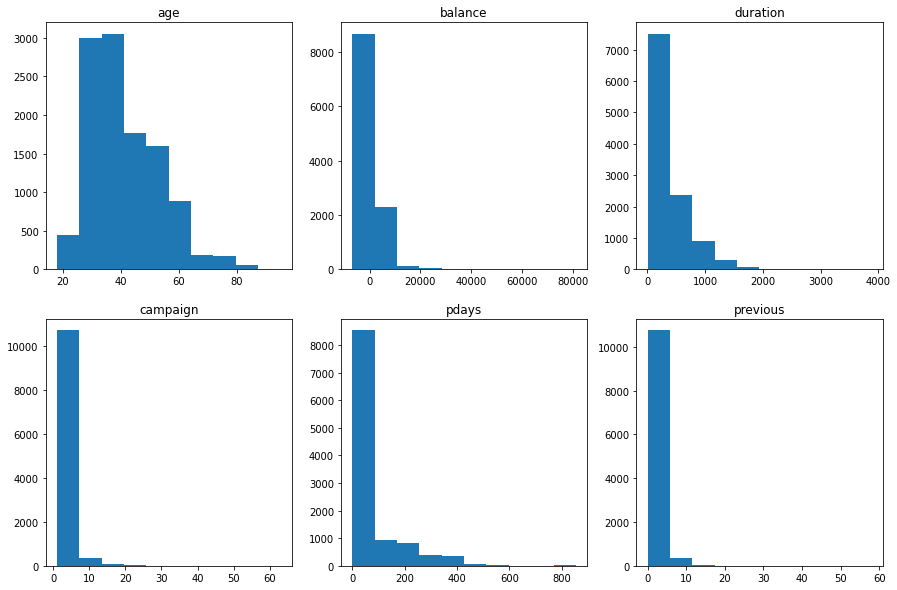

In [45]:
#Histogram of Numerical Variables
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

colors = ['pink']
axs[0, 0].hist(bank['age'])
axs[0, 0].set_title('age')

axs[0, 1].hist(bank['balance'])
axs[0, 1].set_title('balance')

axs[0, 2].hist(bank['duration'])
axs[0, 2].set_title('duration')

axs[1, 0].hist(bank['campaign'])
axs[1, 0].set_title('campaign')

axs[1, 1].hist(bank['pdays'])
axs[1, 1].set_title('pdays')

axs[1, 2].hist(bank['previous'])
axs[1, 2].set_title('previous')

plt.show()

# **Data Cleansing**

**Dealing with outliers**

In [47]:
bank1=bank.copy()
for i in bank1.columns:
  if bank1[i].dtypes == 'O':
    bank1=bank1.drop([i],1)
bank1.head()

,age,balance,duration,campaign,pdays,previous
0,59,2343,1042,1,-1,0
1,56,45,1467,1,-1,0
2,41,1270,1389,1,-1,0
3,55,2476,579,1,-1,0
4,54,184,673,2,-1,0


In [48]:
z=np.abs(stats.zscore(bank1._get_numeric_data()))
print(z)
bank=bank[(z<3).all(axis=1)]
print(bank.shape)

[[1.49150488 0.25252514 1.93022589 0.55416834 0.48118405 0.36325984]
 [1.23967567 0.4599736  3.15461161 0.55416834 0.48118405 0.36325984]
 [0.0194704  0.0801603  2.92990082 0.55416834 0.48118405 0.36325984]
 ...
 [0.77495804 0.46493443 0.62225823 0.18678537 0.48118405 0.36325984]
 [0.14841574 0.47392593 1.04575164 0.18678537 1.10957066 1.81833188]
 [0.6070719  0.47392593 0.73753015 0.55416834 0.48118405 0.36325984]]
(10098, 17)


**Correcting typos**

In [66]:
#Checking if there are typos or not
unique_value=[]
column_name=[]
#Correcting Typos
for i in bank.columns:
  if bank[i].dtypes == 'O':
    value_categorical=bank[i].unique()
    unique_value.append(value_categorical)
    column_name.append(i)
    print('Variable',i,'and its unique value are',value_categorical)

Variable job and its unique value are ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
Variable marital and its unique value are ['married' 'single' 'divorced']
Variable education and its unique value are ['secondary' 'tertiary' 'primary' 'unknown']
Variable default and its unique value are ['no' 'yes']
Variable housing and its unique value are ['yes' 'no']
Variable loan and its unique value are ['no' 'yes']
Variable contact and its unique value are ['unknown' 'cellular' 'telephone']
Variable day and its unique value are ['5' '6' '7' '8' '9' '12' '13' '14' '15' '16' '19' '20' '21' '23' '26'
 '27' '28' '29' '30' '2' '3' '4' '11' '17' '18' '24' '1' '10' '22' '25'
 '31']
Variable month and its unique value are ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Variable poutcome and its unique value are ['unknown' 'other' 'failure' 'success']
Variable deposit and its 

Grouping sparse classes